In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Load the saved CNN model
model = keras.models.load_model('CNN_model.h5')

generated_seq = pd.read_csv('Generated promoters & Candidates.csv')
pcc6803_seq = pd.read_csv('PCC6803 Promoter and reads 100bp.csv')
pcc6803_seq

ERROR! Session/line number was not unique in database. History logging moved to new session 3


,Promoter,Reads
0,CACCTCCAAATTATCTAAGTTAGCCAAATACCAAGAAGATTGGGCA...,106
1,TTTTGGGGAAACCGGCCGGGTCAGATTTAATCAGCGGCAACATCAC...,643
2,CCAAACGATGCTGAAGTTTACCGTTGCTGGTGAGCAGCAATAGTCC...,372
3,CAGCAACTCTTAACGGGAAATCCCAATGGTCCCTGGCAGAAAAAAT...,834
4,CCTGAATATCTCCAGGGTTATACCGCCCCCGATGAAGCTTTTGTTT...,1496
...,...,...
3707,GAACCAAGTCGATTTGGGTTTATGAAAGCCAGAGGACAGGGCGGGG...,3711
3708,ACAACGTTGATCTACGGGCCGTTTATCGCAAGCTTGGCGATCGTCG...,4417
3709,TGCTTAGTTGAATTAGCTATAAACTAAATCAGTCAATTAGTCAGCT...,46
3710,GGGGGCAAACAGGGAGGTAGTGGAGATCATCGGCTGGCCAAACTTG...,6568


In [9]:
# 2.

import numpy as np

def one_hot_encoding_test(df, seq_column):
    bases = ['A', 'C', 'G', 'T']
    base_dict = dict(zip(bases, range(4)))
    n = len(df)
    total_width = df[seq_column].str.len().max() + 20
    X = np.zeros((n, 1, 4, total_width))
    seqs = df[seq_column].values
    for i in range(n):
        seq = seqs[i]
        for b in range(len(seq)):
            X[i, 0, base_dict[seq[b]], b + 10 + 100 - len(seq)] = 1    
    return X, total_width

# Usage:
X_test_encoded, total_width = one_hot_encoding_test(pcc6803_seq, 'Promoter')
total_width

120

ERROR! Session/line number was not unique in database. History logging moved to new session 6


In [6]:
# Predict the output (mRNA expression level)
predicted_output = model.predict(X_test_encoded)

# Example of how to use the predicted output
# Assuming you want to print the first 10 predictions
print("Predicted mRNA expression levels:")
for i in range(10):
    print(predicted_output[i])


Predicted mRNA expression levels:
[7.5914264]
[8.638052]
[8.468082]
[11.736656]
[11.01922]
[9.473843]
[11.732722]
[14.963807]
[10.988917]
[11.116663]


/NAS/home/yychoi/miniconda3/envs/capstone/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


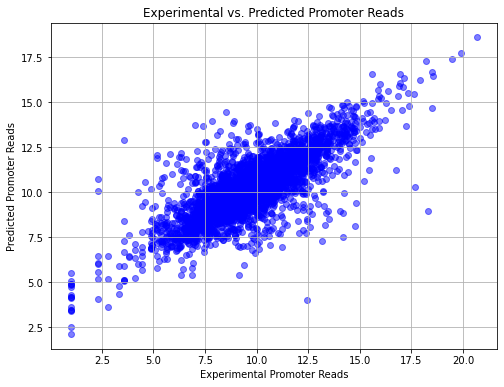

In [10]:
import matplotlib.pyplot as plt

# Assuming y_test contains the experimental promoter reads
# Replace this with your actual experimental promoter reads
y_test = np.log2(pcc6803_seq['Reads'])
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_output, color='blue', alpha=0.5)
plt.title('Experimental vs. Predicted Promoter Reads')
plt.xlabel('Experimental Promoter Reads')
plt.ylabel('Predicted Promoter Reads')
plt.grid(True)
plt.show()


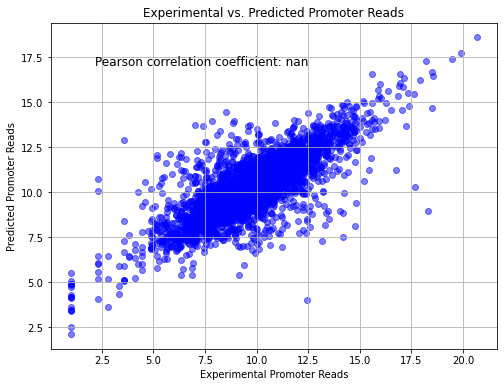

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming y_test contains the experimental promoter reads
# Replace this with your actual experimental promoter reads
y_test = np.log2(pcc6803_seq['Reads'])

y_test_np = y_test.values

# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(y_test_np.flatten(), predicted_output.flatten())[0, 1]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, predicted_output, color='blue', alpha=0.5)
plt.title('Experimental vs. Predicted Promoter Reads')
plt.xlabel('Experimental Promoter Reads')
plt.ylabel('Predicted Promoter Reads')
plt.grid(True)

# Add correlation coefficient to the plot
plt.text(0.1, 0.9, f'Pearson correlation coefficient: {correlation_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# Remove rows with NaN or infinite values from y_test and predicted_output
valid_indices = np.logical_and(~np.isnan(y_test), ~np.isinf(y_test))
valid_indices &= np.logical_and(~np.isnan(predicted_output), ~np.isinf(predicted_output))
y_test_clean = y_test[valid_indices]
predicted_output_clean = predicted_output[valid_indices]

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(y_test_clean, predicted_output_clean)
print('Pearson correlation coefficient:', corr)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 9
Traceback (most recent call last):
  File "/NAS/home/yychoi/miniconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-3d9d4ca5cd5b>", line 6, in <module>
    valid_indices &= np.logical_and(~np.isnan(predicted_output), ~np.isinf(predicted_output))
  File "/NAS/home/yychoi/miniconda3/envs/capstone/lib/python3.6/site-packages/pandas/core/ops/methods.py", line 96, in f
    result = method(self, other)
  File "/NAS/home/yychoi/miniconda3/envs/capstone/lib/python3.6/site-packages/pandas/core/ops/common.py", line 65, in new_method
    return method(self, other)
  File "/NAS/home/yychoi/miniconda3/envs/capstone/lib/python3.6/site-packages/pandas/core/ops/__init__.py", line 394, in wrapper
    res_values = logical_op(lvalues, rvalues, op)
  File "/NAS/home/yychoi/minicon